In [1]:
import numpy as np
import mne
import sklearn
import matplotlib.pyplot as plt

In [2]:
clean_data = mne.io.read_raw_fif(r'H:\Mg_EEG\edf_files\정용태_7200_clean.fif', preload=True)

Opening raw data file H:\Mg_EEG\edf_files\정용태_7200_clean.fif...
    Range : 0 ... 1439800 =      0.000 ...  7199.000 secs
Ready.
Reading 0 ... 1439800  =      0.000 ...  7199.000 secs...


C:\Users\esin4\AppData\Local\Temp\ipykernel_37420\1652148529.py:1: RuntimeWarning: This filename (H:\Mg_EEG\edf_files\정용태_7200_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean_data = mne.io.read_raw_fif(r'H:\Mg_EEG\edf_files\정용태_7200_clean.fif', preload=True)


In [11]:
%matplotlib qt

clean_data.plot()
plt.show()

In [3]:
#tfr = clean_data.compute_tfr(method='multitaper', freqs=np.arange(1, 31), tmin=0, tmax=7199, n_jobs=-1, reject_by_annotation=True)
tfr = clean_data.compute_tfr(method='multitaper', freqs=np.arange(1, 31), tmin=0, tmax=7199, n_jobs=-1, reject_by_annotation=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:  8.8min remaining: 12.1min
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:  9.0min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:  9.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  9.2min finished


In [6]:
tfr_copy = tfr.copy()

In [7]:
tfr_drop_f4 = tfr_copy.drop_channels("F4")

In [8]:
tfr_data = tfr_drop_f4.data
tfr_mean = np.mean(tfr_data, axis=0)

In [5]:
print(tfr_data)

[[[1.10799856e-08 1.11807737e-08 1.12870979e-08 ... 2.42735452e-08
   2.42658927e-08 2.42590404e-08]
  [4.17322591e-09 4.15026864e-09 4.12599342e-09 ... 1.80837968e-08
   1.79507413e-08 1.78197114e-08]
  [2.76081565e-09 2.74804590e-09 2.73340037e-09 ... 8.89605684e-09
   8.90764500e-09 8.91317154e-09]
  ...
  [2.27928541e-10 2.35349730e-10 2.46684271e-10 ... 2.57308406e-11
   2.26653268e-11 2.22908528e-11]
  [2.26073935e-10 2.27557670e-10 2.27674499e-10 ... 2.39056107e-11
   2.18324224e-11 2.35742926e-11]
  [2.16586213e-10 2.18826135e-10 2.22568562e-10 ... 2.38376573e-11
   2.15492082e-11 2.32337517e-11]]

 [[1.05788471e-08 1.05934515e-08 1.06079274e-08 ... 1.70226153e-08
   1.70315661e-08 1.70432228e-08]
  [8.02539810e-10 7.98755249e-10 7.94910410e-10 ... 3.98929412e-09
   3.96651435e-09 3.94269199e-09]
  [7.87170604e-10 7.86191856e-10 7.85101412e-10 ... 8.71867950e-10
   8.65703443e-10 8.59900445e-10]
  ...
  [4.58834730e-11 4.64960894e-11 4.81186154e-11 ... 3.89197840e-11
   3.31893

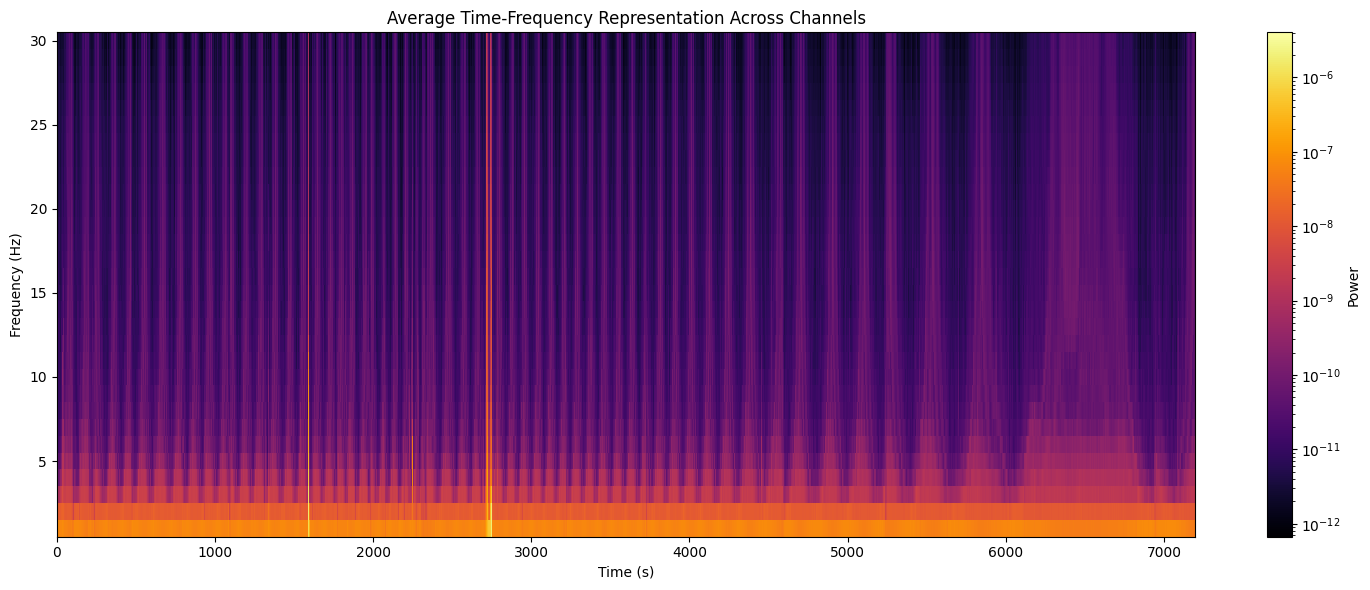

In [9]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                   norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                   cmap='inferno', shading='auto')

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()